# Кластеризация

Перед тем, как приступить к практике, **ответим на следующие вопросы**:

<ol>
    <li>Чем отличается обучение с учителем от обучения без учителя?</li>
    <li>Какую цель мы приследуем используя подходы без учителя?</li>
    <li>Когда нам может быть полезна кластеризация в "реальной жизни"?</li>
</ol>

На данном семинаре мы будем использовать различные подходы, разработанные для выделение групп объектов с похожими свойствами, для кластеризации фильмов опубликованных на [Netflix](https://www.kaggle.com/shivamb/netflix-shows).

## Данные

Прочитайте таблицу `Netflix.csv` и возьмём только строки с описанием фильмов, у которых есть текстовое описание:

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
path = '/content/drive/MyDrive/Shad/2022S_ML2/sem5 cluster/'

In [84]:
import pandas as pd

table = pd.read_csv(path + 'Netflix.csv', index_col=0)
table.head()

type                  title         director  \
show_id                                                    
s1         Movie   Dick Johnson Is Dead  Kirsten Johnson   
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   

                                                      cast        country  \
show_id                                                                     
s1                                                     NaN  United States   
s2       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
s3       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
s4                                                     NaN            NaN   
s5       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

                 date_added  release_year rating   duration  \
show_id                                                       
s1       September 25, 2021          2020  PG-13     90 min   
s2       September 24, 2021          2021  TV-MA  2 Seasons   
s3       September 24, 2021          2021  TV-MA   1 Season   
s4       September 24, 2021          2021  TV-MA   1 Season   
s5       September 24, 2021          2021  TV-MA  2 Seasons   

                                                 listed_in  \
show_id                                                      
s1                                           Documentaries   
s2         International TV Shows, TV Dramas, TV Mysteries   
s3       Crime TV Shows, International TV Shows, TV Act...   
s4                                  Docuseries, Reality TV   
s5       International TV Shows, Romantic TV Shows, TV ...   

                                               description  
show_id                                                     
s1       As her father nears the end of his life, filmm...  
s2       After crossing paths at a party, a Cape Town t...  
s3       To protect his family from a powerful drug lor...  
s4       Feuds, flirtations and toilet talk go down amo...  
s5       In a city of coaching centers known to train I...

In [85]:
table = table[(table.type == 'Movie') & (table.description == table.description)]
assert 6131 == len(table)

print(f'Total rows: {len(table)}')

Total rows: 6131


## Векторизация текста

<details>
  <summary>Какие базовые способы векторизации текста вы знаете?</summary>
    <ol>
      <li><b>BOW</b>: <a href=https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html>sklearn.feature_extraction.text.CountVectorizer</a></li>
      <li><b>Tf-Idf</b>: <a href=https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html>sklearn.feature_extraction.text.TfidfVectorizer</a></li>
    </ol>
Также ответим на следующие вопросы: 
    <ol>
        <li>Какие недостатки у данных методов векторизации?</li>
        <li>Почему предпочтём <i>Tf-Idf</i> перед <i>BOW</i>?</li>
    </ol>
</details>

Используя один из базовых способов векторизации, преобразуем описания фильмов:

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english')

X = vectorizer.fit_transform(table['description'])

vocabulary = vectorizer.get_feature_names()

X = pd.DataFrame(X.toarray(), columns=vocabulary, index=table.index)

X = X[X.sum(axis=1) != 0]

X.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000   10  100   11   12   13   14   15  1590   16  ...  york  young  \
show_id                                                     ...                
s1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0    0.0   
s7       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0    0.0   
s8       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0    0.0   

         younger  youth  youtube  zack  zany  zealand  zombie  zone  
show_id                                                              
s1           0.0    0.0      0.0   0.0   0.0      0.0     0.0   0.0  
s7           0.0    0.0      0.0   0.0   0.0      0.0     0.0   0.0  
s8           0.0    0.0      0.0   0.0   0.0      0.0     0.0   0.0  

[3 rows x 3530 columns]

## Визуализация данных

<details>
  <summary>Как нам визуализировать наши данные на плоскости?</summary>
  
  Воспользуемся <a href=https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html>sklearn.manifold.TSNE</a>
    
</details>

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


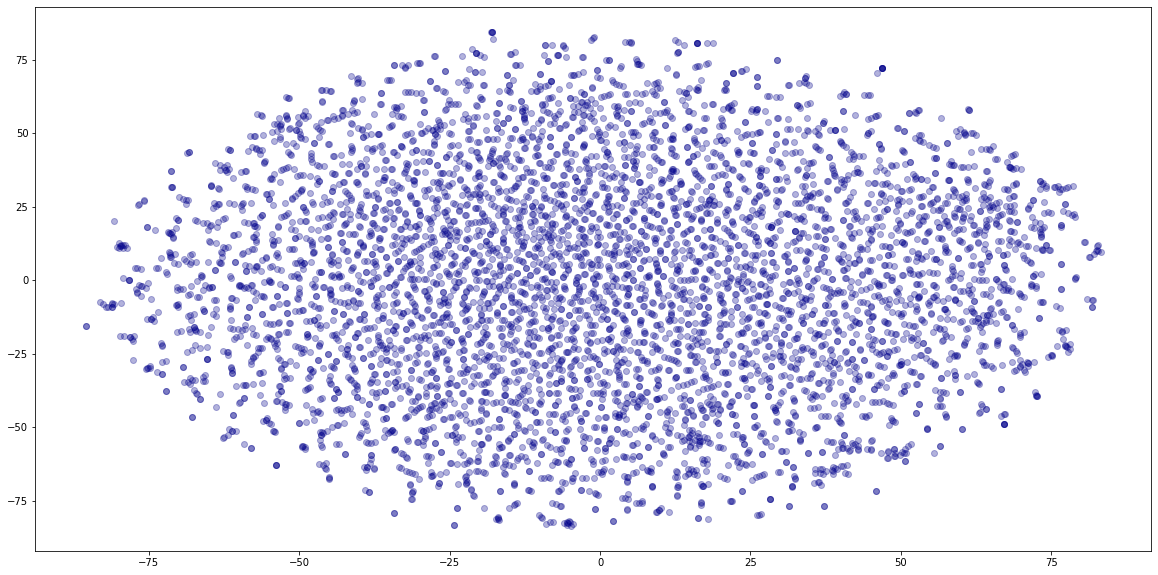

In [87]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

X_2d = TSNE().fit_transform(X)

plt.figure(figsize=(20, 10))
plt.scatter(*zip(*X_2d), color='darkblue', alpha=0.3)
plt.show()

## Метод К-средних

Сейчас перед нами стоит задача самостоятельно реализовать *метод K-средних*

<details>
    <summary>Какой минимальный набор гиперпараметров должна принимать наша базовая реализация?
    </summary>
    <ol>
        <li><b>n_clusters</b> : <i>int</i> : The number of clusters to form as well as the number of centroids to generate</li>
        <li><b>max_iter</b> : <i>int</i> : Maximum number of iterations of the k-means algorithm for a single run</li>
        <li><b>tol</b> : <i>float</i> : Relative tolerance of the difference in the cluster centers of two consecutive iterations to declare convergence</li>
    </ol>
</details>

Реализуем класс `CustomKMeans`, 

который будет наследоваться от [sklearn.base.ClusterMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.ClusterMixin.html#sklearn.base.ClusterMixin.fit_predict), 

и иметь методы `fit` и `predict`, 

и атребуты `cluster_centers_` и `labels_`:

In [88]:
import numpy as np

from random import choices
from sklearn.base import ClusterMixin

class CustomKMeans(ClusterMixin):
    def __init__(self, n_clusters=8, max_iter=300, tol=0.0001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        
    def _init_cluster_centers(self, X):
        indexes = range(len(X))
        indexes = choices(indexes, k=self.n_clusters)
        
        self.cluster_centers_ = X[indexes]
        
    def _distance(self, x):
        return np.sqrt(((x - self.cluster_centers_) ** 2).sum(axis=1))
        
    def predict(self, X):
        return np.array([self._distance(x) for x in X]).argmin(axis=1)
        
    def fit(self, X):
        self._init_cluster_centers(X)
        
        for self.n_iter_ in range(self.max_iter):
            self.labels_ = self.predict(X)

            new_cluster_centers_ = np.array([
                X[self.labels_ == label].mean(axis=0)
                for label in range(self.n_clusters)
            ])
            
            if np.abs(new_cluster_centers_ - self.cluster_centers_).sum() < self.tol:
                break
            
            self.cluster_centers_ = new_cluster_centers_
        
        return self

Посмотрим за сколько имерация сошлась наша реализация метода:

In [89]:
from tqdm import tqdm

n_start = 10
n_iters = [CustomKMeans().fit(X.values).n_iter_ for _ in tqdm(range(n_start))]

print(f'Mean {sum(n_iters) / n_start} iterations' )

100%|██████████| 10/10 [01:42<00:00, 10.25s/it]

Mean 25.7 iterations


In [90]:
n_iters

[37, 39, 22, 36, 29, 18, 16, 27, 17, 16]

Сравним скорость сходимости с реализацияей [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html):

In [91]:
from sklearn.cluster import KMeans

n_start = 1
n_iters = [KMeans(init='random', n_init=1, algorithm='full').fit(X.values).n_iter_ for _ in tqdm(range(n_start))]

print(f'Mean {sum(n_iters) / n_start} iterations' )

100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

Mean 22.0 iterations


In [92]:
n_iters

[22]

<details>
    <summary>Какие параметры следует выставить иначе чем дефолтные, что бы приблизить реализацию из <i>sklearn</i> к нашей реализации?</summary>
    <ol>
        <li><b>init</b>: random</li>
        <li><b>n_init</b>: 1</li>
        <li><b>algorithm</b>: full</li>
    </ol>
</details>

## Визуализация кластеров

Реализуем функцию `cluster_visualisation`, которая в качестве параметров будет принимать:
   
<ol>
    <li><b>X</b> : <i>ndarray</i> : 2d-representations</li>
    <li><b>labels</b> : <i>ndarray</i> : sequence of X's labels</li>
    <li><b>cl_names</b> : <i>list (default None)</i> : clusters names. If cl_names is None then generate names like claster_0</li>
</ol>

In [93]:
def cluster_visualisation(X, labels, cl_names=None):
    plt.figure(figsize=(20, 10))
    
    if not cl_names:
        cl_names = [f'cluster_{label}' for label in sorted(set(labels))]
        
    for cl_label, cl_name in zip(sorted(set(labels)), cl_names):
        plt.scatter(*zip(*X[labels == cl_label]), alpha=0.5, label=f'{cl_name}')
    
    plt.legend(title='Clusters')
    plt.show()

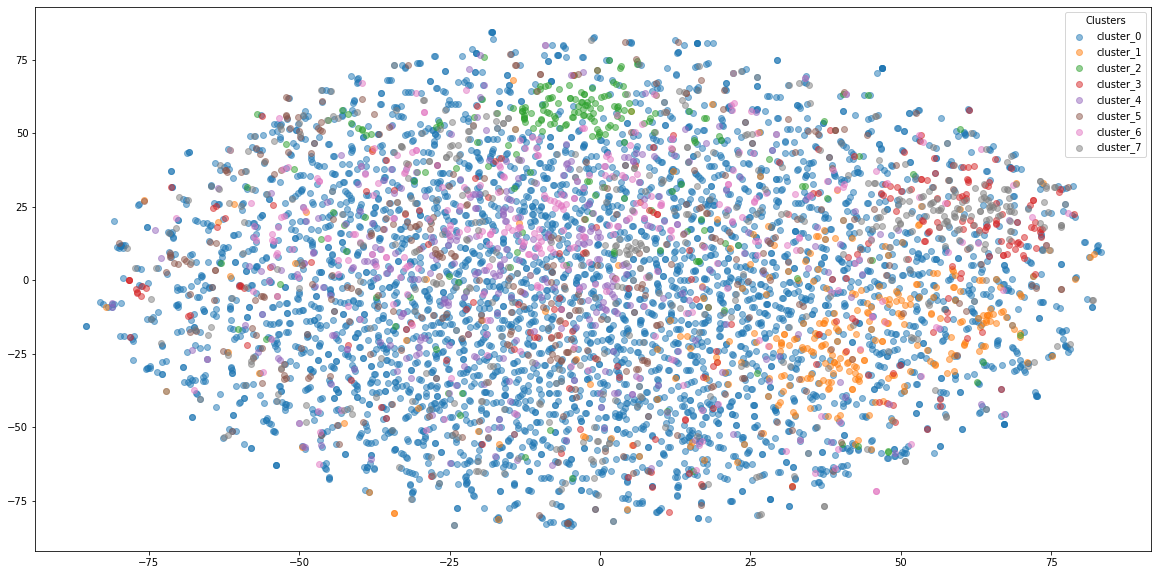

In [94]:
km = CustomKMeans().fit(X.values)

cluster_visualisation(X_2d, km.labels_)

<details>
    <summary>Что мы можем сказать о полученной кластеризации? Как мы можем получить больше информации?</summary>
    
    Глядя на облако точек, мы мало что можем сказать о полученной кластеризации, а уж тем более не возможно понять полезно ли нам то, что мы получили.
    
    Что бы убедиться в адекватности полученных результатов, нужно постараться интерпретировать каждый класс. Как это сделать?
</details>



In [95]:
def cluster_names(cluster_centers, vocabulary, N=5):
    cluster_centers = pd.DataFrame(cluster_centers, columns=vocabulary)
    
    return [', '.join(tokens.sort_values(ascending=False)[:N].index) for _, tokens in cluster_centers.iterrows()]

In [96]:
cl_names = cluster_names(km.cluster_centers_, vocabulary)

for index, cl_name in enumerate(cl_names):
    print(f'cluster_{index}: {cl_name}')

cluster_0: young, life, man, family, world
cluster_1: documentary, follows, explores, life, interviews
cluster_2: school, high, students, student, girl
cluster_3: years, comedian, stand, takes, special
cluster_4: woman, young, man, husband, life
cluster_5: home, save, family, new, couple
cluster_6: love, falls, life, young, woman
cluster_7: new, special, stand, york, comedy


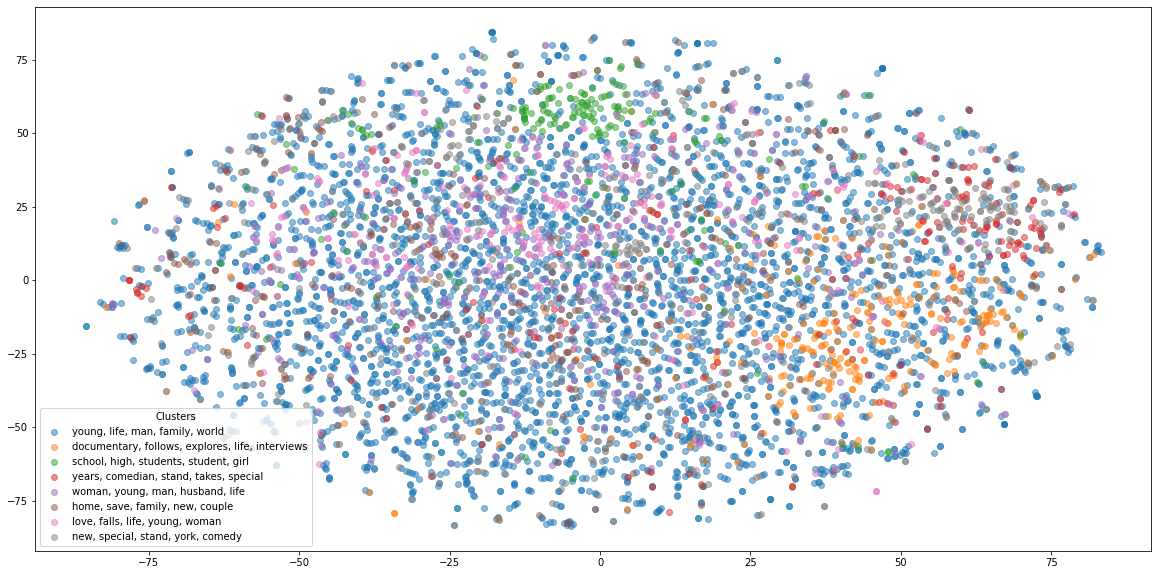

In [97]:
cluster_visualisation(X_2d, km.labels_, cl_names)

## K-means++ 

<ol>
    <li>В чём может заключатся проблема, реализованного нами, подхода инициализации центроидов кластеров?</li>
    <li>Как можно усовершенствовать способ инициализации центроидов кластеров?</li>
</ol>

Усовершенствуем в нашей реализации способ инициализации:

In [98]:
from random import choice, choices

class CustomKMeans(CustomKMeans):
    
    def _init_cluster_centers(self, X):
        indexes = list(range(len(X)))
        
        cluster_centers_index = choice(indexes)
        
        indexes.remove(cluster_centers_index)
        cluster_centers_indexes = [cluster_centers_index]
        
        self.cluster_centers_ = X[cluster_centers_indexes]
        
        for _ in range(self.n_clusters - 1):
            weights = np.array([self._distance(x) for x in X[indexes]]).min(axis=1) ** 2
            cluster_centers_index = choices(indexes, weights=weights, k=1)[0]
            
            indexes.remove(cluster_centers_index)
            cluster_centers_indexes.append(cluster_centers_index)
            
            self.cluster_centers_ = X[cluster_centers_indexes]

In [99]:
n_start = 1
n_iters = [CustomKMeans().fit(X.values).n_iter_ for _ in tqdm(range(n_start))]

print(f'Mean {sum(n_iters) / n_start} iterations' )

100%|██████████| 1/1 [00:09<00:00,  9.35s/it]

Mean 19.0 iterations


In [100]:
n_iters

[19]

In [101]:
n_iters = [KMeans(n_init=1, algorithm='full').fit(X.values).n_iter_ for _ in tqdm(range(n_start))]

print(f'Mean {sum(n_iters) / n_start} iterations' )

100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

Mean 21.0 iterations


In [102]:
n_iters

[21]

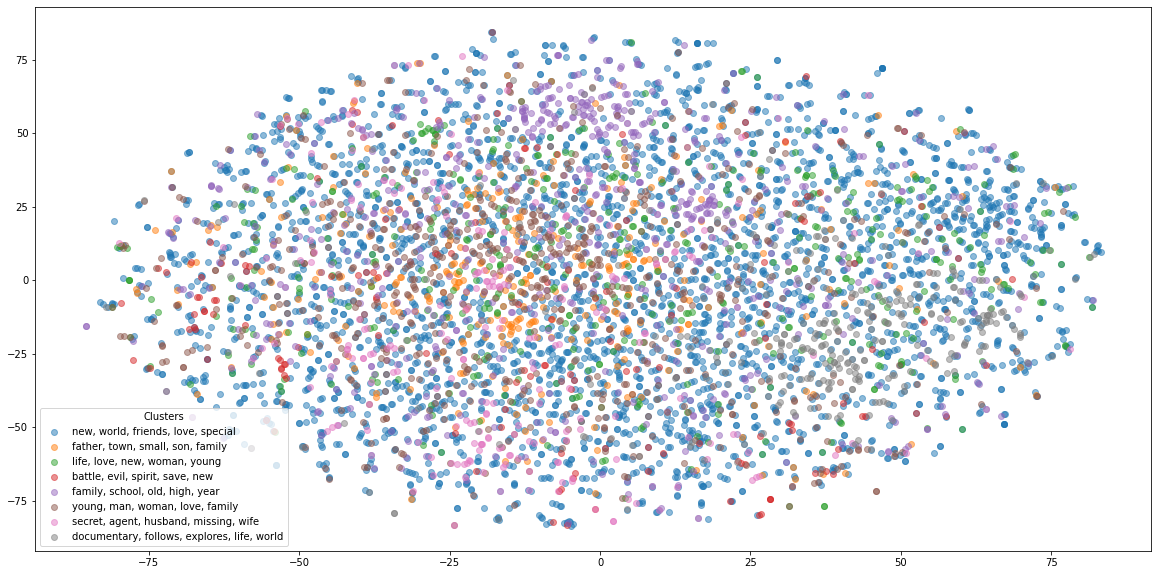

In [103]:
km = CustomKMeans().fit(X.values)

cluster_visualisation(X_2d, km.labels_, cluster_names(km.cluster_centers_, vocabulary))

<details>
    <summary>Можно ли использовать другое расстояние?</summary>
    Попробуем заменить <i>Евклидову метрику</i> на <i>Косинусное расстояние</i>
</details>

In [104]:
class CustomKMeans(CustomKMeans):
    def _distance(self, x):
        return  (1 - (x * self.cluster_centers_).sum(axis=1)) / ( (x ** 2).sum() * (self.cluster_centers_ ** 2).sum() )

In [105]:
n_start = 1
n_iters = [CustomKMeans().fit(X.values).n_iter_ for _ in tqdm(range(n_start))]

print(f'Mean {sum(n_iters) / n_start} iterations')

100%|██████████| 1/1 [00:12<00:00, 12.49s/it]

Mean 19.0 iterations


In [106]:
n_iters

[19]

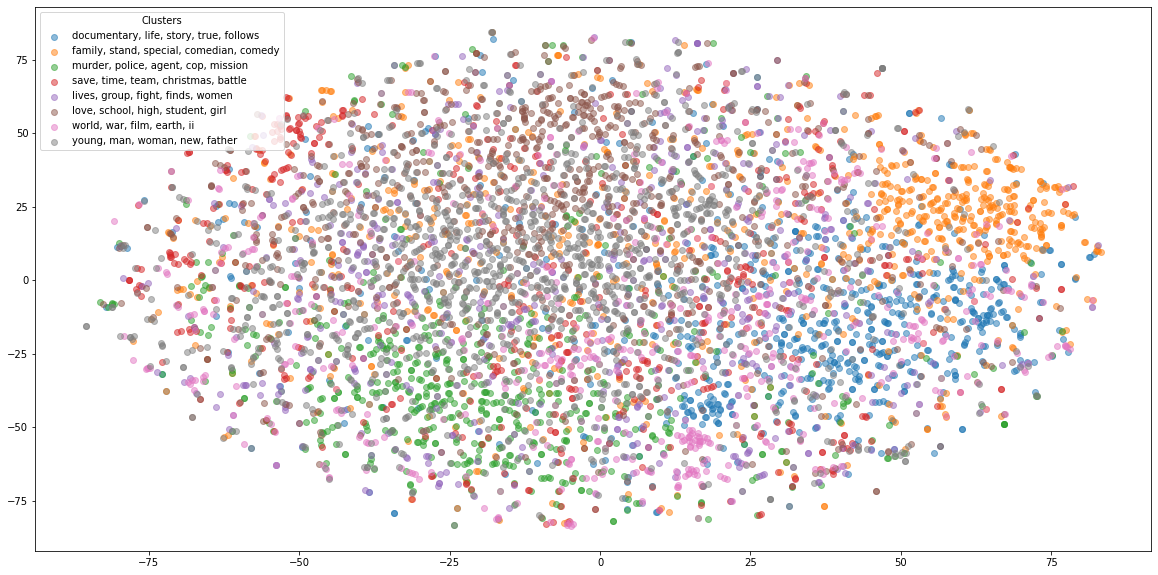

In [107]:
km = CustomKMeans().fit(X.values)

cluster_visualisation(X_2d, km.labels_, cluster_names(km.cluster_centers_, vocabulary))

## Снижение размерности

<details>
    <summary>Как, в данном случае, мы можем снизить размерность данных?</summary>
    <ol>
        <li>Использовать <b>PCA</b></li>
        <li>Использовать предобученные вектора слов, например <a href=https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip>wiki-news-300d-1M.vec.zip</a></li>
    </ol>
    Давайте воспользуемся вторым вариантом:
</details>

In [108]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    
    iter, max_iter = 0, 800000
    data = {}
    for line in tqdm(fin):
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = np.array(list(map(float, tokens[1:])))
        
        continue
        iter += 1
        if iter >= max_iter:
            break

    return data

embeddings = load_vectors(path + 'wiki-news-300d-1M.vec')

999995it [01:47, 9336.68it/s]


In [109]:
vocabulary = list(set(vocabulary) & set(embeddings))

print(f'Total {len(vocabulary)} tokens')

Total 3523 tokens


In [110]:
X = X[vocabulary]

embeddings = np.array([list(embeddings[token]) for token in vocabulary])

X_300d = X @ embeddings

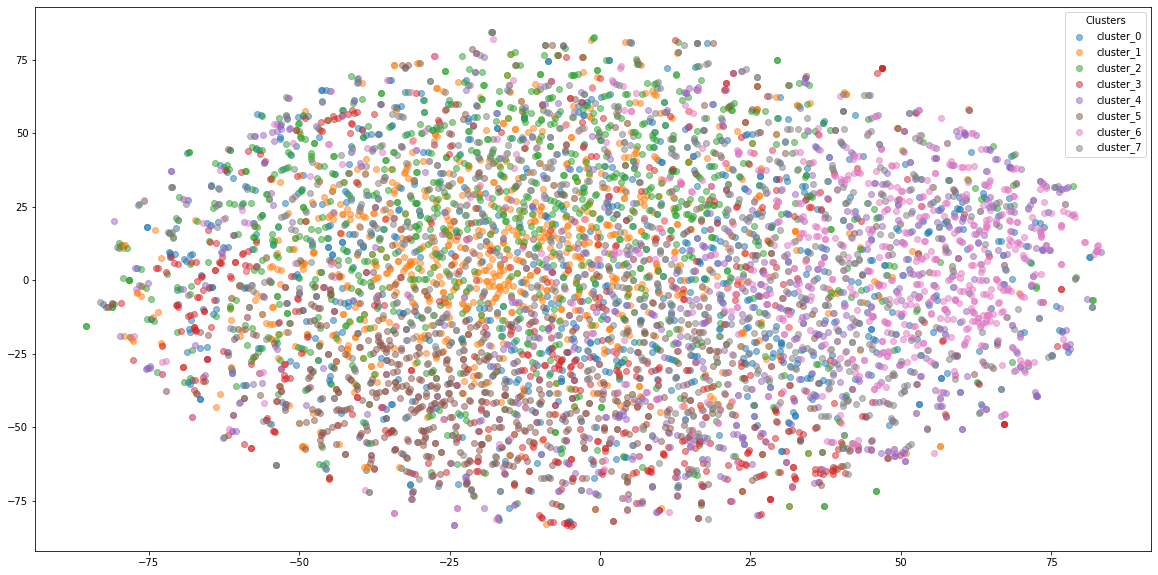

In [111]:
km = KMeans().fit(X_300d.values)

cluster_visualisation(X_2d, km.labels_)

Как в данном случае интерпретировать кластера?

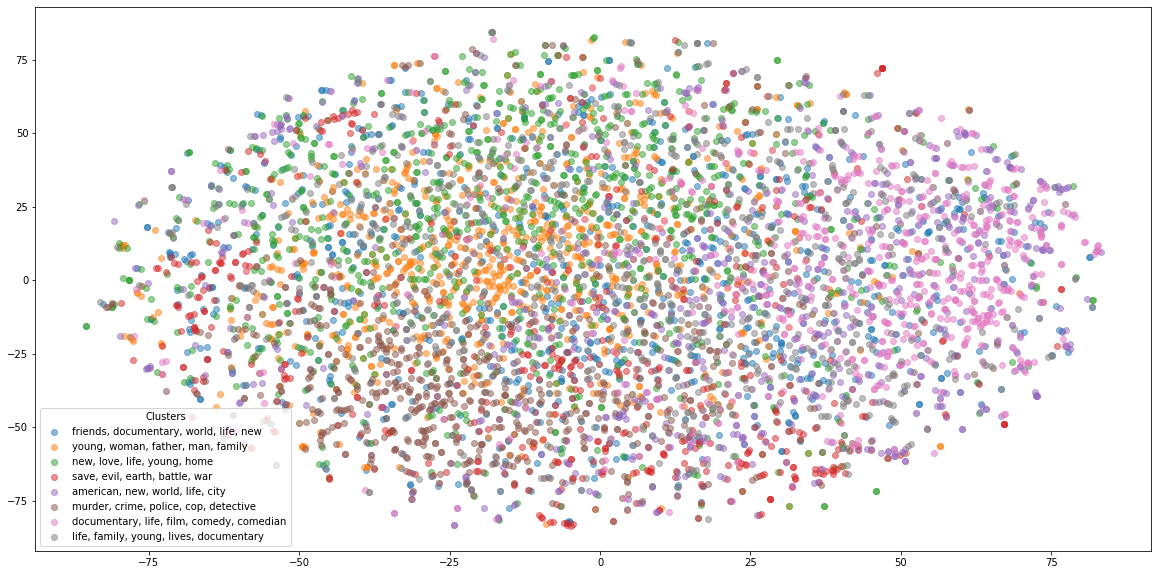

In [112]:
def cluster_names(X, labels, N=5):
    cl_names = []
    for label in sorted(set(labels)):
        cluster_center = X[labels == label].mean(axis=0)
        cl_names.append(', '.join(cluster_center.sort_values(ascending=False)[:N].index))
    
    return cl_names

cluster_visualisation(X_2d, km.labels_, cluster_names(X, km.labels_))

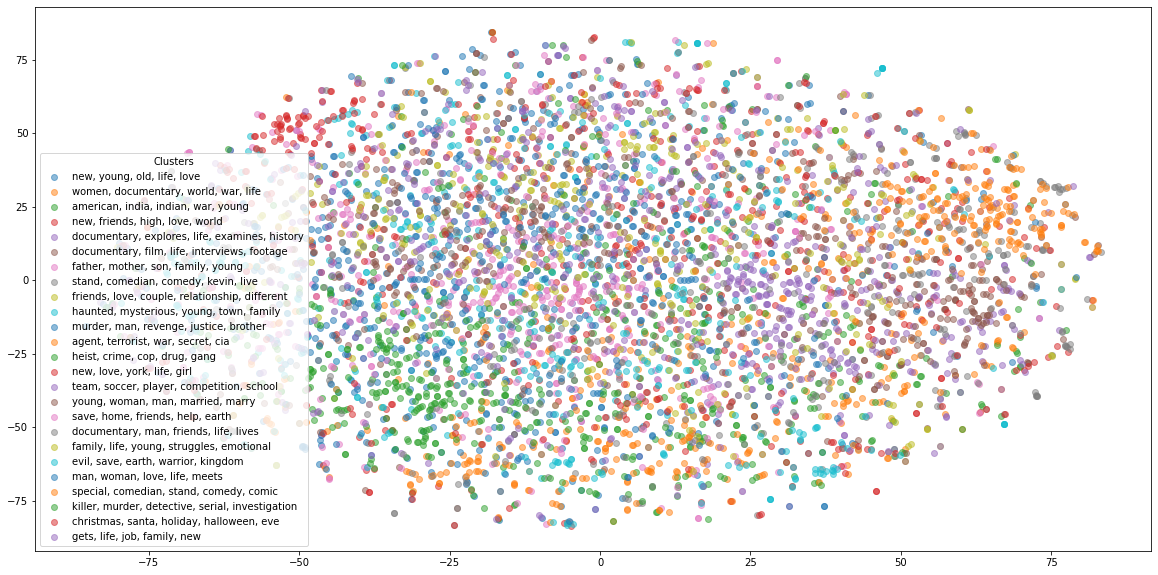

In [113]:
km = KMeans(n_clusters=25).fit(X_300d.values)

cluster_visualisation(X_2d, km.labels_, cluster_names(X, km.labels_))

## DBSCAN

Обучите [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) попробовав подобрать `metric`, `eps` и `min_samples`, так что бы выделились осмысленные кластеры:

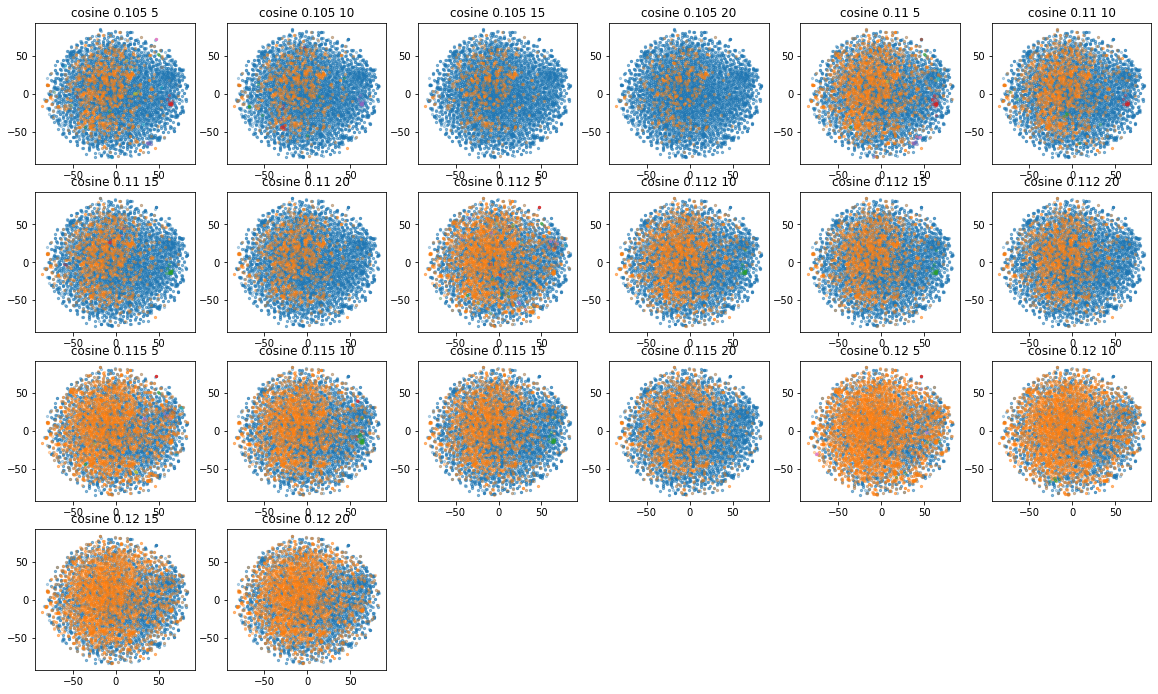

In [114]:
metrics = ['cosine']
epss = [0.105, 0.11, 0.112, 0.115, 0.12]
min_sampless = [5, 10, 15, 20]

plt.figure(figsize=(20, 15))
nrows = 5
ncols = 6
i = 1

for metric in metrics:
    for eps in epss:
        for min_samples in min_sampless:
            dbscan = DBSCAN(metric=metric, eps=eps, min_samples=min_samples).fit(X_300d.values)

            # cluster_visualisation(X_2d, dbscan.labels_, cluster_names(X, dbscan.labels_))
            
            plt.subplot(nrows, ncols, i)
            for cl_label, cl_name in zip(sorted(set(dbscan.labels_)), cluster_names(X, dbscan.labels_)):
                plt.scatter(*zip(*X_2d[dbscan.labels_ == cl_label]), alpha=0.3, s=5, label=f'{cl_name}')
            
            plt.title('{} {} {}'.format(metric, eps, min_samples))

            i += 1

plt.show()

In [115]:
def cluster_visualisation(X, labels, cl_names=None):
    plt.figure(figsize=(20, 10))
    
    if not cl_names:
        cl_names = [f'cluster_{label}' for label in sorted(set(labels))]
        
    for cl_label, cl_name in zip(sorted(set(labels)), cl_names):
        plt.scatter(*zip(*X[labels == cl_label]), alpha=0.5, label=f'{cl_name}')
    
    plt.legend(title='Clusters')
    plt.show()

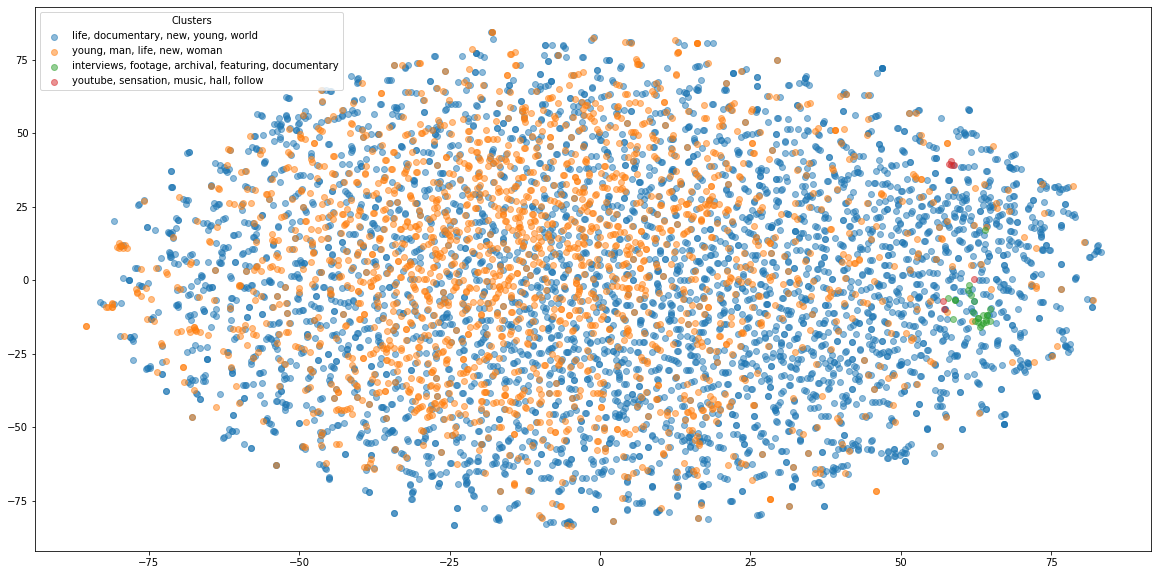

In [116]:
from sklearn.cluster import DBSCAN

metric = 'cosine'
eps = 0.115
min_samples = 10
dbscan = DBSCAN(metric=metric, eps=eps, min_samples=min_samples).fit(X_300d.values)

cluster_visualisation(X_2d, dbscan.labels_, cluster_names(X, dbscan.labels_))

## Иерархическая агломеративная кластеризация

Используя [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) кластеризуйте фильмы, 

подобрав оптимальное число кластеров и визуализировав наиболее значемые из них: 

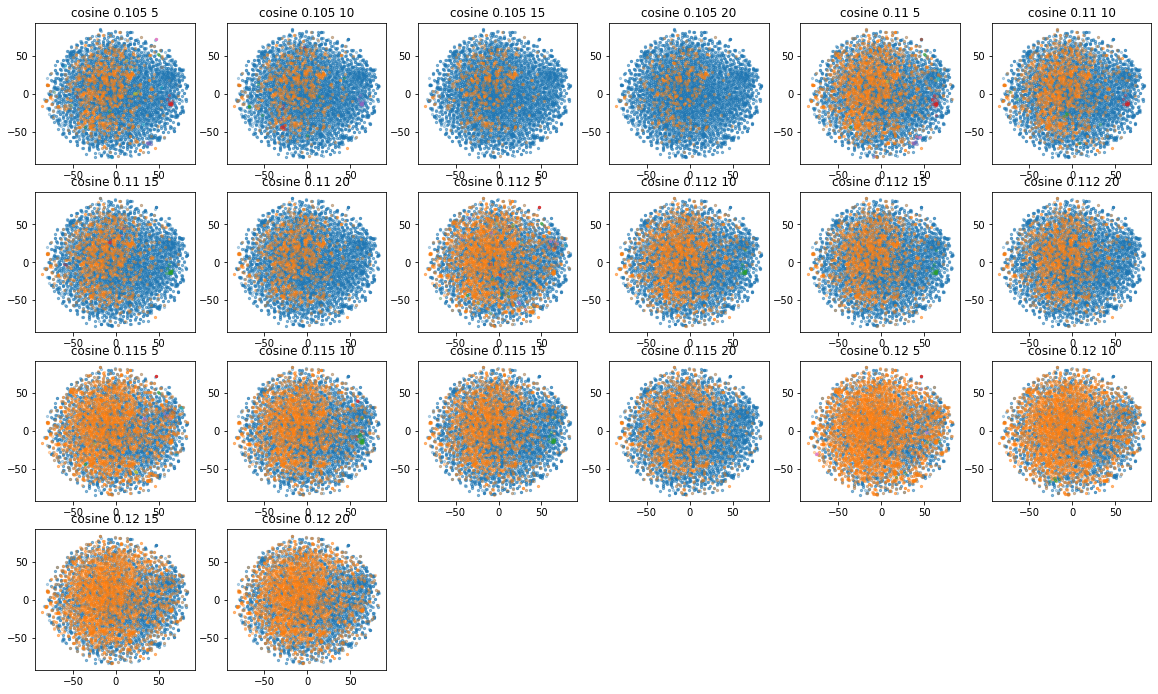

In [117]:
metrics = ['cosine']
epss = [0.105, 0.11, 0.112, 0.115, 0.12]
min_sampless = [5, 10, 15, 20]

plt.figure(figsize=(20, 15))
nrows = 5
ncols = 6
i = 1

for metric in metrics:
    for eps in epss:
        for min_samples in min_sampless:
            dbscan = DBSCAN(metric=metric, eps=eps, min_samples=min_samples).fit(X_300d.values)

            # cluster_visualisation(X_2d, dbscan.labels_, cluster_names(X, dbscan.labels_))
            
            plt.subplot(nrows, ncols, i)
            for cl_label, cl_name in zip(sorted(set(dbscan.labels_)), cluster_names(X, dbscan.labels_)):
                plt.scatter(*zip(*X_2d[dbscan.labels_ == cl_label]), alpha=0.3, s=5, label=f'{cl_name}')
            
            plt.title('{} {} {}'.format(metric, eps, min_samples))

            i += 1

plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
method = 'single'
metric = 'cosine'
linked = linkage(X.values, method=method, metric=metric)

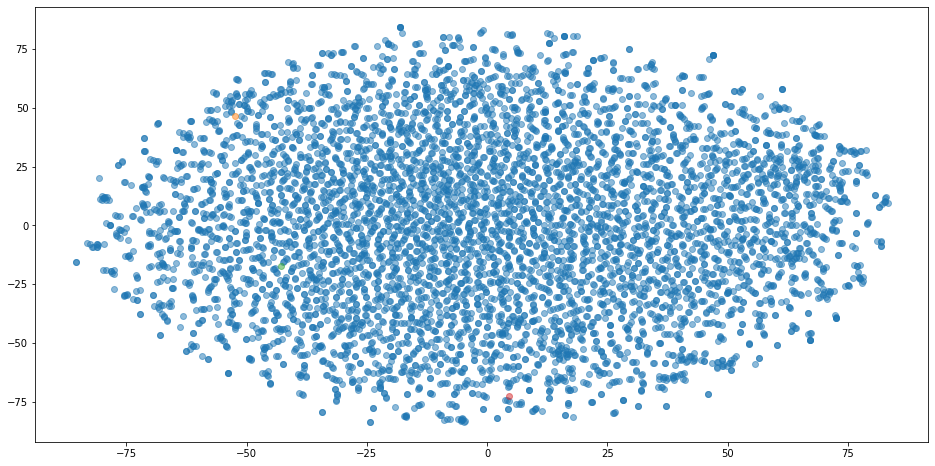

In [128]:
labels = fcluster(linked, 4, criterion='maxclust')

plt.figure(figsize=(16, 8))
    
for label in set(labels):
    plt.scatter(*zip(*X_2d[labels == label]), alpha=0.5)
    
plt.show()

In [124]:
unique_labels, counts = np.unique(labels, return_counts=True)

thr = 0
for label, count in zip(unique_labels, counts):
    if count > thr:
        print(f'{label} : {count}')
        
unique_labels = unique_labels[counts > thr]

1 : 2
2 : 6123
3 : 1
4 : 1
5 : 1
6 : 1
7 : 1
8 : 1


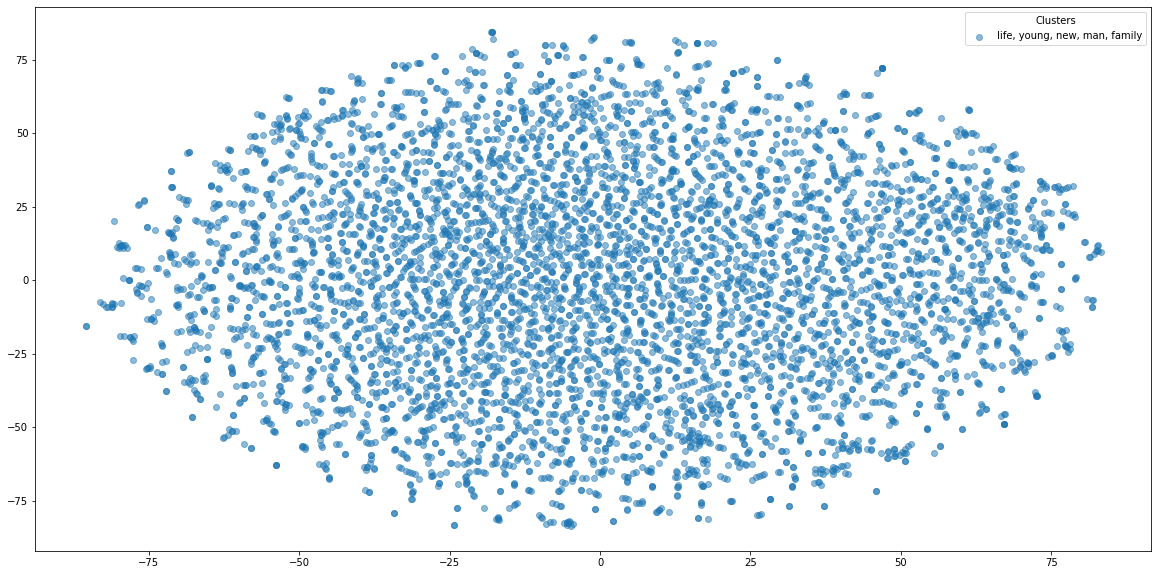

In [121]:
flags = [label in unique_labels for label in labels]
cut_labels = labels[flags]

cluster_visualisation(X_2d[flags], cut_labels, cluster_names(X[flags], cut_labels))